# Hands-on Evolutionary Modelling II
26/01/2026 Tin-Yu Hui

This notebook extends the WF model to incorporate selection/migration/recombination (one at a time, of course). Some examples, such as the spread of insecticide resistance allele and equilibrium population differentiation, are particularly interesting. 

#### 1. Drift-selection
##### 1.1 Drift-selection simulator
Assumptions: We assume allele "1" is under selection. The gametic frequency is no longer identical to the current allele frequency because individuals carrying different alleles (or genotypes) will now have different fitness, thus have biased contribution to the gamete pool. 

Given this setting the relative fitness for the three genotypes are:

| 00 | 01 | 11 |
|---|---|---|
|1|1-h*s|1-s|

The key is to work out the gametic frequency after selection (exercise). 

Parameters: Selection coefficient $s$ (against "11"). Dominance $h$. Both should be between 0 and 1. $N$, $p_0$, $t$. 
 
Output(s): same as <code>sim_genetic_drift()</code>

In [1]:
sim_drift_selection<-function(N=10, p0=0.5, t=5, s=0.2, h=0.5)
{
    # LET US WRITE A FUNCTION WITHIN A FUNCTION. A FUNCTION TO CALCULATE GENOTYPIC COUNT FROM A MATRIX
    cal.gt<-function(x)
    {
        y<-x[1,]+x[2,]
        # RETURN COUNTS OF 00, 01, 11
        return(c(sum(y==0), sum(y==1), sum(y==2)))
    }
    # THE BIG LIST OF MATRICES (TO BE FILLED IN LATER)
    population<-list()
    length(population)<-t+1
    # GIVE NAMES TO THE ELEMENTS
    for (i in 1:(t+1))
    {
        names(population)[i]<-paste(c('generation_', i-1), collapse='')
    }
    # A VECTOR FOR ALLELE FREQ
    allele.freq<-rep(NA, t+1)
    # INITIALISE
    # NUMBER OF "0" ALLELE AT THE START, GOVERNED BY p0
    k<-round(2*N*p0)
    population[[1]]<-matrix(sample(c(rep(0, k), rep(1, 2*N-k))), nr=2)
    # THE INITIAL ALLELE FREQ
    allele.freq[1]<-sum(population[[1]]==0)/(2*N)
    # FITNESS FOR THE THREE GENOTYPES
    w<-c(1, 1-h*s, 1-s)
    # PROPAGATION
    for (i in 1:t)
    {
        # CALCULATE NEW GAMETIC FREQ, BUT THIS TIME REQUIRES GENOTYPIC INFO
        gt<-cal.gt(population[[i]])
        after_selection<-gt*w
        p<-(gt[1]*w[1]+0.5*gt[2]*w[2])/sum(after_selection)
        population[[i+1]]<-matrix(sample(0:1, size=2*N, prob=c(p, 1-p), replace=T), nr=2)
        # UPDATE NEW FREQ
        allele.freq[i+1]<-sum(population[[i+1]]==0)/(2*N)
    }
    # RETURN A BIG LIST, EXIT
    return(list(population=population, allele.freq=allele.freq))
}

In [2]:
# TEST RUN
sim_drift_selection()

1,1,1,0,0,0,0,0,1,0
0,1,0,1,1,1,0,0,1,1
0,1,0,1,0,0,1,0,0,0
1,1,1,1,1,0,0,1,1,0
1,1,1,0,1,0,1,0,0,1
0,0,1,1,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,1,1,1,1
0,0,0,0,0,0,0,1,0,0
0,1,0,1,0,1,1,0,0,1
0,0,0,0,0,0,1,0,1,0


A directional change in allele frequency is expected if the locus is under selection (i.e. $E[p_t]\not=p_0$). Let us visiaulise some trajectories of the allele frequency of "0" when $N=100$, $s=0.2$, and $h=0.5$. Here $s>0$ means allele "1" is selected against. 

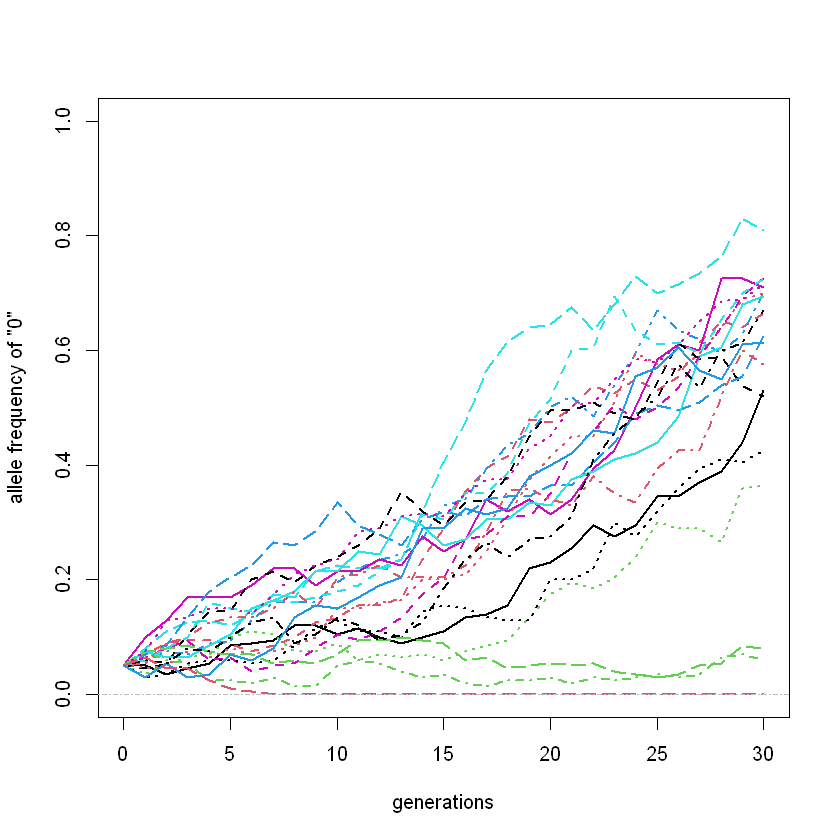

In [3]:
# N=100, s=0.1, h=0.5, p0=0.05
# 20 REPLICATES
result<-matrix(nc=31, nr=20)
for (i in 1:nrow(result))
{
    # RUN ONE SIM, RECORD THE ALLELE FREQ OF "0"
    result[i,]<-sim_drift_selection(N=100, s=0.2, h=0.5, p0=0.05, t=30)$allele.freq
}
# PLOT
matplot(0:30, t(result), ylim=c(0, 1), type='l', lwd=2, 
       xlab='generations', ylab='allele frequency of "0"')
abline(h=0, col='grey', lty=40)

It is quite clear that the frequency of "0" is expected to go up due to selection, but it needs to overcome the effect of drift before it can firmly establish in the population. 

##### 1.2 Case study: the evolution of new insecticide resistance variants in *Anopheles gambiae* 
Kientega et al. (2024) conducted a longitudinal study on the evolution on some known IR target genes from the malaria vectors in Burkina Faso. They found an "increasing gene amplification signal in the ace1 locus, from 32.65% in 2012 to up to 91.67% in 2017", which was "was corroborated by the increase in the insecticide resistance associated with ace1-G280S variant". 

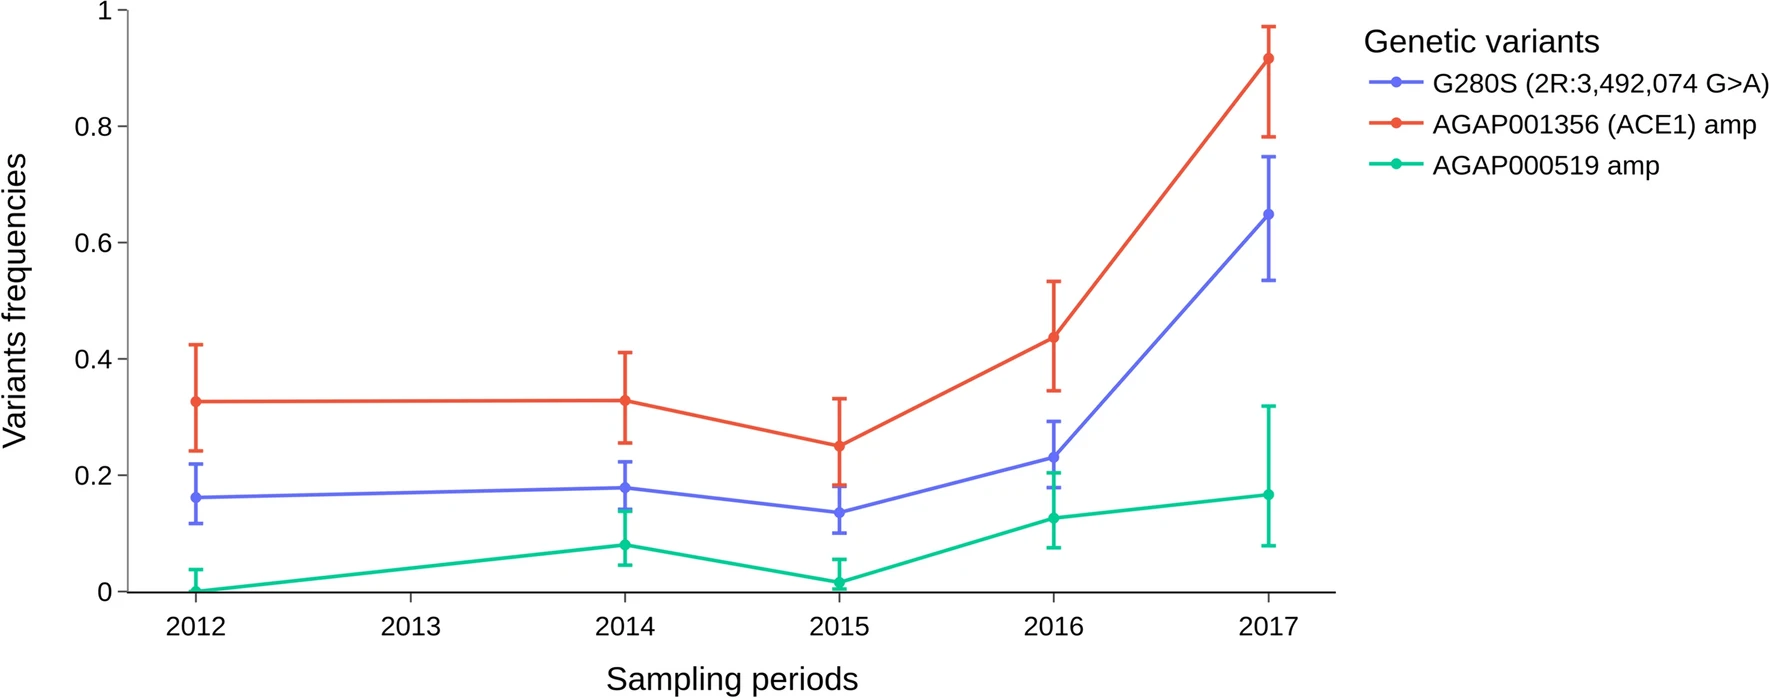

This justifies the urgent need to develop new and sustainable genetic technologies for vector control. 


#### 2. Drift-migration model
It is easy to extend the drift model to more than one population. Generally speaking, a migration matrix is required to specify connectivity, and the gametic frequency of a population is a linear conbination of the frequencies across all populations. In the simplest case with two populations A and B, then the gametic frequency in A will be $(1-m_A)*p_A+m_A*p_B$, where $m_A$ is the immigration rate from B into A per generation, and $p_A$ and $p_B$ are their current allele frequencies. See Wang & Whitlock (2003) for details. 

In [4]:
sim_drift_migration<-function(p0_A=0.5, p0_B=0.5, t=10, N_A, N_B, m_A, m_B)
{
# AS WE HAVE TWO POPULATAIONS WE NEED TWO LISTS TO STORE THE ALLELIC CONFIGURATIONS
#  FROM GEN 0 TO t, HENCE LENGTH (t+1)
population.A<-list()
population.B<-list()
length(population.A)<-t+1
length(population.B)<-t+1
# (OPTIONAL) GIVE NAMES TO THE ELEMENTS OF population
names(population.A)<-rep(NA, t+1)
names(population.B)<-rep(NA, t+1)
for (i in 1:(t+1))
	{
	names(population.A)[i]<-paste(c('generation', i-1), collapse='')
	names(population.B)[i]<-paste(c('generation', i-1), collapse='')
	}
# TWO VECTORS FOR TWO ALLELE FREQUENCIES OVER TIME
allele.freq.A<-rep(NA, t+1)
allele.freq.B<-rep(NA, t+1)
# INITIALISATION. WE NEED TO INITIALISE BOTH POPULATIONS. SAME AS BEFORE. 
# INITIALISE POPULATION A AND ITS FREQ
k<-ceiling(2*N_A*p0_A)
population.A[[1]]<-matrix(sample(c(rep(0, k), rep(1, 2*N_A-k))), nr=2)
allele.freq.A[1]<-sum(population.A[[1]]==0)/(2*N_A)
# DO THE SAME FOR POPULATION B. BEWARE OF TYPO
k<-ceiling(2*N_B*p0_B)
population.B[[1]]<-matrix(sample(c(rep(0, k), rep(1, 2*N_B-k))), nr=2)
allele.freq.B[1]<-sum(population.B[[1]]==0)/(2*N_B)
# PROPAGATION
for (i in 1:t)
	{
	# THE GAMETE FREQ ISN'T THE SAME AS ALLELE FREQ AS WE NEED TO TAKE MIGRATION INTO ACCOUNT
	# THE GAMETE FREQ FOR POPULATION A IS (1-m_A) OF EXISTING ALLELE FREQ IN THE SAME POPULATION, PLUS m_A OF ALLELE FREQ IN POPULATION B (THOSE WHO MOVED FROM B TO A). 
	gamete.freq.A<-(1-m_A)*allele.freq.A[i]+m_A*allele.freq.B[i]
	gamete.freq.B<-(1-m_B)*allele.freq.B[i]+m_B*allele.freq.A[i]
	# THEN WE CAN SAMPLE THE NEXT GEN WITH THE GAMETE FREQ AFTER MIGRATION
	population.A[[i+1]]<-matrix(sample(0:1, size=2*N_A, prob=c(gamete.freq.A, 1-gamete.freq.A), replace=T), nr=2)
	population.B[[i+1]]<-matrix(sample(0:1, size=2*N_B, prob=c(gamete.freq.B, 1-gamete.freq.B), replace=T), nr=2)
	# CALCULATE THE NEW ALLELE FREQ
	allele.freq.A[i+1]<-sum(population.A[[i+1]]==0)/(2*N_A)
	allele.freq.B[i+1]<-sum(population.B[[i+1]]==0)/(2*N_B)
	}
# RETURN
return(list(population.A=population.A, population.B=population.B, allele.freq.A=allele.freq.A, allele.freq.B=allele.freq.B))
}

##### 2.2 Population differentiation and $F_{ST}$
Structured or sub-divided populations maintain certain levels of population differentiation. One common measure is $F_{ST}$, which can be calculated from the squared difference in allele frequencies between two populations: 

$$F_{ST}=\frac{(p_A-p_B)^2}{\bar{p}*(1-\bar{p})}$$

where $\bar{p}$ is the pooled frequency. We can calcualte one $F_{ST}$ per locus, and take the average across multiple loci as the overall value. Two populations are completely isolated if $F_{ST}\rightarrow1$. Conversely, $F_{ST}\rightarrow0$ means the two populations are well-mixed (thus can be treated as one). 

Below I compare the $F_{ST}$ under two scenarios: migration rates (both ways) of 0.05 and 0.1. The population sizes are identical. 2000 independent loci are simulated. 

In [5]:
# PAIRWISE FST WITH 2000 LOCI, PARALLELISED
require(doParallel)
cl<-makeCluster(44)
registerDoParallel(cl)
# FIRST SCENARIO. MIGRATION RATE 0.05
result_m0.05<-foreach(i=1:2000, .combine='rbind') %dopar%
{
    # SIM THE TWO POPULATIONS
    temp<-sim_drift_migration(p0_A=0.5, p0_B=0.5, N_A=1000, N_B=1000, t=50, m_A=0.05, m_B=0.05)
    # AVERAGE OF TWO ALLELE FREQ
    x<-temp$allele.freq.A
    y<-temp$allele.freq.B
    z<-(x+y)/2
    # FST, CHECK FORMULA
    FST<-(x-y)^2/(z*(1-z))
    return(FST)
}
# SECOND SCENARIO. MIGRATION RATE 0.1
result_m0.1<-foreach(i=1:2000, .combine='rbind') %dopar%
{
    # SIM THE TWO POPULATIONS
    temp<-sim_drift_migration(p0_A=0.5, p0_B=0.5, N_A=1000, N_B=1000, t=50, m_A=0.1, m_B=0.1)
    # AVERAGE OF TWO ALLELE FREQ
    x<-temp$allele.freq.A
    y<-temp$allele.freq.B
    z<-(x+y)/2
    # FST, CHECK FORMULA
    FST<-(x-y)^2/(z*(1-z))
    return(FST)
}
stopCluster(cl)

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



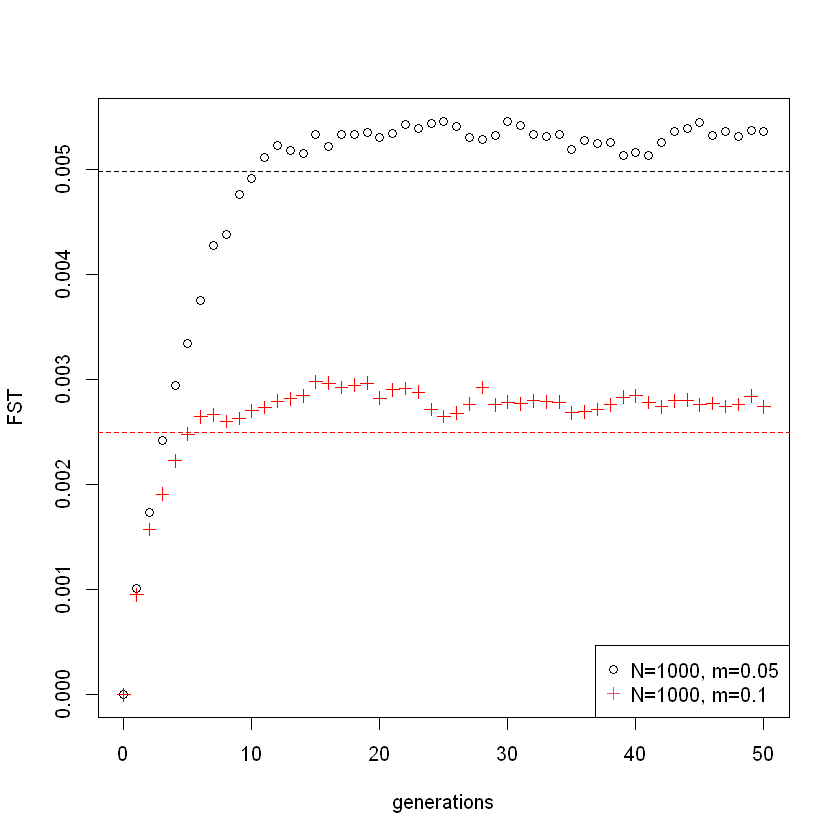

In [10]:
# PLOT THE AVERAGE FST OVER TIME
plot(0:50, apply(result_m0.05, 2, mean), xlab='generations', ylab='FST')
points(0:50, apply(result_m0.1, 2, mean), xlab='generations', ylab='FST', col='red', pch=3)
legend('bottomright', legend=c('N=1000, m=0.05', 'N=1000, m=0.1'), col=1:2, pch=c(1,3))
abline(h=1/(1+4*1000*0.05), col=1, lty=2)
abline(h=1/(1+4*1000*0.1), col='red', lty=2)

The simulation begins with $F_{ST}=0$, resembling the scenario of population fragmentation. Their frequencies begin to diverge as they split and undergo local WF reproduction. Such divergence is maintained by the exchange of migrants and eventually reaches an equilibrium. The time to equilibrium and the equilibrium value are functions of $m$ and $N$. Lower migration rate yields larger $F_{ST}$, and it also takes longer to reach its equilibrium.

In fact the equilibrium $F_{ST}$ goes like $1/(1+4Nm)$ (???).

#### 3. A little touch on coalescent
Let us assume we have 10 haploid in the parental generation. They may carry either the "0" or "1" allele, but we do not care about their states. All we want to know is who's who. Let us call them A to J: 

In [7]:
parents<-LETTERS[1:10]
parents

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J"

In [8]:
# USE RANDOM SEED TO GET THE SAME RANDOM DRAWS. WORK FOR R VERSION >=4.0
set.seed(12345)
offspring<-sample(parents, size=10, replace=T)
offspring

[1] "C" "J" "H" "J" "H" "B" "F" "F" "G" "J"

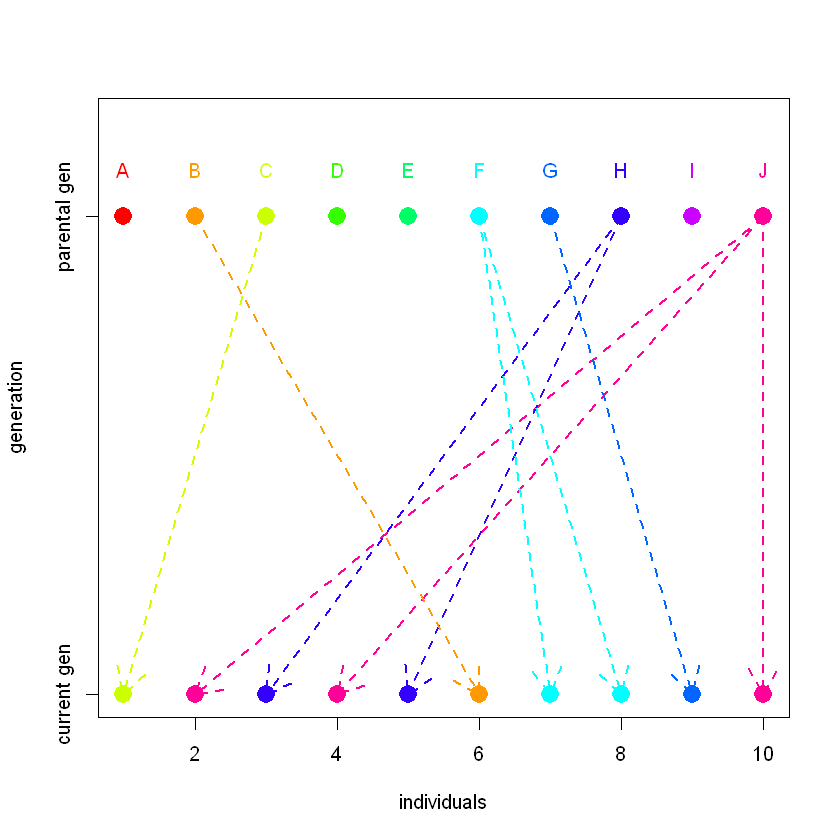

In [9]:
# MAKE A PLOT FOR ALL OFFSPRING-PARENT RELATIONSHIPS
col<-rainbow(10)
plot(1:10, rep(1, 10), ylim=c(0,1.2), col=col, pch=16, cex=2, 
    xlab='individuals', ylab='generation', yaxt='n')
for (i in 1:10)
    {text(x=i, y=1.1, labels=LETTERS[i], col=col[i])}
axis(2, at=0:1, labels=c('current gen', 'parental gen'))
points(1:10, rep(0, 10), col=col[match(offspring, LETTERS[1:10])], pch=16, cex=2)
for (i in 1:10)
{
    arrows(match(offspring[i], LETTERS[1:10]), 1, i, 0, col=col[match(offspring[i], LETTERS[1:10])], lty=2, lwd=2)
}

The diagram shows the relationship between the two generations. The first offspring is a descendant of parent C. Parents J and F have more than one offspring. We also notice that individuals (A, D, E, I) from the parental generation make no contribution to the next (and subsequent) generations. It is said that their lineages are lost. 

We can repeat the same procedure for parents (B, C, F, G, H, J) to find their parents, and so on. Going backward in time, there can only be fewer and fewer (great-)^n-grandparents, until all current individuals descend from a single ancestor. 

You can easily code your coalescent simulator by sampling parents (which is equivalent to sampling offspring!). You will notice that the waiting time between two coalescent events (i.e. when two lineages join together) increases when there are very few of them left. See Hartl & Clark, or Kingman (1980). 

In forward simulation, we need to simulate the entire population with $N$ individuals even our focus is on a small subset of samples $s<<N$. We also waste a lot of time simulating lineages/individuals that do not contribute to the final generation. The backward simulation provides a quick solution to build the genealogy only for the given set of samples, thus is the basis for many backward genomic simulators, like msprime. 

Once the genealogy tree is built, mutations can be added onto the tree branches to create alleles (polymorphism) under drift-mutation equilibrium. The tree can also "evolve" along a chromosome in multi-locus scenario as recombination breaks and distort lineages. 

#### 4. Drift-recombination model
Recombination is an evolutionary force to create new haplotypes. It concerns the interaction between loci (usually along the same chromosome). 

Again I am only sketching the idea here. Suppose we have a two-locus, two-allele system along a chromosome. Alleles A and a are found on the first locus, B and b the second. There are four combinations, or haplotypes: AB, Ab, aB, ab. 

| | A | a | 
|---|---|---|
|**B**|$p_{AB}$|$p_{aB}$|
|**b**|$p_{Ab}$|$p_{ab}$|

Given the relative proportion of the four haplotypes, we can calculate the linkage disequilibrium (LD) coefficient $D$:
$$D=p_{AB}*p_{ab}-p_{aB}*p_{Ab}$$

where $p_{AB}$ is the relative proportion of haplotype AB in the current population. An alternative formula for $D$ will be the difference between $p_{AB}$ and the product of the marginal frequencies of A and B. If $D=0$ then the pair is said to be in linkage equilibrium (LE), otherwise they are in LD. 

If the two loci are physically linked (e.g. nearby loci on the same chromosome) then the alleles on the first locus will affect the choice of another. Before we proceed, let me introduce another parameter, the recombination rate $c$, $0<=c<=0.5$. When $c=0$ it means the two loci never recombine, and they always transmit (or evolve) together. When $c=0.5$, it means there is 50% chance that the two recombine, providing a good possiblility of creating new haplotypes. In other words, $c$ describes how tight the linkage is (see also genetic distance). 

In order to calculate the gametic frequency of AB, we must find the proportion of AB gametes under all 4+3+2+1=10 diploid haplotypic combinations. For instance, if a parent carries two copies of AB, then it must produce AB gamete with probability 1 regardless of $c$. Similarly, it is impossible for a parent who carries two ab to transmit AB gametes. Usually the trouble lies with the double heterozyotes. If a parent carries Ab on one strand and aB on another, it cannot produce AB gametes unless there is recombination. Therefore, the chance of transmitting an AB gamete is 0.5*$c$. That $c$ is the probability of recombination, and the 0.5 comes from the prospect that it can still transmit the other ab gamete after recombination. The table below summarises all the haplotyic combinations and their probability of creating AB gametes: 

| | AB | Ab | aB | ab |
| --: | --: | --: | --: | --: |
| **AB** | 1 | --- | --- | --- | 
| **Ab** | 0.5 | 0 | --- | --- | 
| **aB** | 0.5 | 0.5*$c$ | 0 | --- | 
| **ab** | 0.5*(1-$c$) | 0 | 0 | 0 | 

Combining all these information, we can calculate the gametic frequency of AB in the gamete pool (exercise):
$$gametic\ freq\ AB=p_{AB}-c*D$$
$$gametic\ freq\ Ab=p_{Ab}+c*D$$
$$gametic\ freq\ aB=p_{aB}+c*D$$
$$gametic\ freq\ ab=p_{ab}-c*D$$

New offspring are formed by sampling gametes from a multinomial distribution, with probabilities governed by the gametic frequencies. 

With drift and recombination, $E[D]=0$ over time but there is an equilibrium value for $Var[D]>0$. See Hill and Robertson (1968) for LD decay. Such idea was generalised in Hui, Brenas, Burt (2021) on the correlation of allele frequencies. 

#### 5. References
Kientega, M., Clarkson, C. S., Traoré, N., Hui, T. Y. J., O’Loughlin, S., Millogo, A. A., ... & Diabaté, A. (2024). Whole-genome sequencing of major malaria vectors reveals the evolution of new insecticide resistance variants in a longitudinal study in Burkina Faso. Malaria Journal, 23(1), 280.

Kingman, J. F. C. (1982). The coalescent. Stochastic processes and their applications, 13(3), 235-248.

Hill, W. G., & Robertson, A. (1968). Linkage disequilibrium in finite populations. Theoretical and applied genetics, 38, 226-231.

Hui, T. Y. J., Brenas, J. H., & Burt, A. (2021). Contemporary $N_e$ estimation using temporally spaced data with linked loci. Molecular Ecology Resources, 21(7), 2221-2230.

#### 6. Acknowledgements
I thank Fred Chen for running this year's tutorial session. 